# Droplet Generation System. Hydraulic part

# Problem setup

## Piston Dynamics

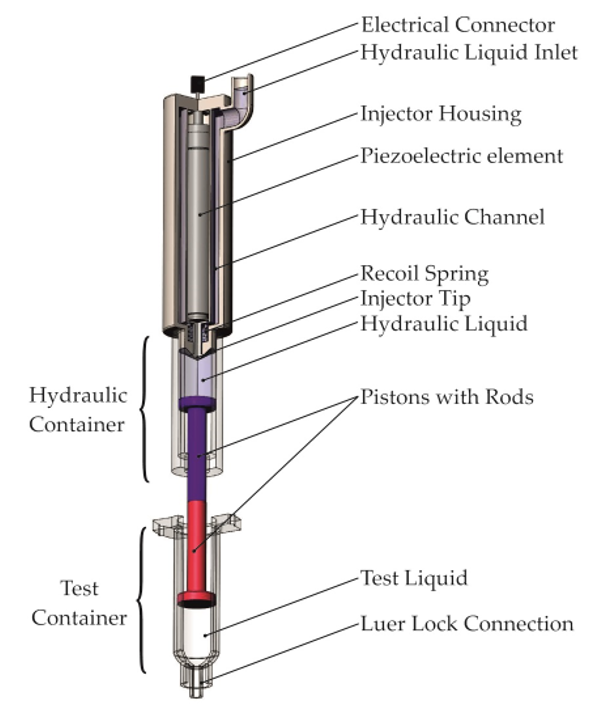

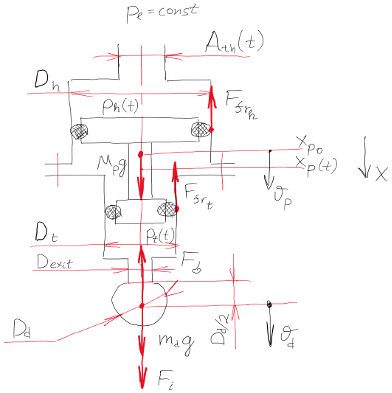

Piston moves by the hydraulic and friction forces action:
$$
    m_p\ddot{x_p} = m_pg + F_h - F_{fr},
$$
### Hydraulic force $F_h$:
$$
    F_h = p_h A_h - p_t A_t,
$$
where hydraulic container pressure, according to the Darcy-Weisbach equation and relationship of the lateral surface area of the throttle "cylinder" to the position of the spool (**action**) $A_{th}(t) = \pi D_{th} x_{th}(t)$:
$$
    p_h = p_l - \frac{\zeta_{th}\rho_h D_h^4}{32D_{th}^2}\left(\frac{\dot{x_p}}{x_{th}}\right)^2
$$
test container pressure (according to the Darcy-Weisbach equation):
$$
    p_t = p_{atm} + \frac{\zeta_{exit}\rho_t D_t^4}{2D_{exit}^4}\dot{x_p}^2
$$

Hydraulic/Test container area:
$$
    A_{h,t}=\frac{\pi D_{h,t}^2}{4}
$$

$p_l$ - pressure of the hydraulic liquid before throttling;
$p_{atm}$ - ambient environment (atmosphere) pressure;
$\zeta_{th}, \zeta_{exit}$ - hydraulic loss coefficients at throttle and at syringe exit respectively;
$\rho_h, \rho_t$ - densities of the hydraulic and test containers liquids

### Friction $F_{fr}$
Friction can be considered both by a stribeck curve or mechanical efficiency.
Let us use a mechanical efficiency approach:
$$
    F_{fr} = \max{(F_C, (1-\eta)F_h)},
$$

where $\eta$ - mechanical efficiency;
Coulomb friction force:
$$
    F_C = p_C\cdot\max{(A_h, A_t)}
$$
$p_C$ - pressure difference, which is necessary to overcome the dry friction

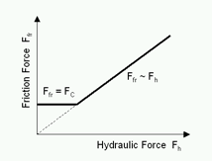

## State dynamics function

Movement starts when acting force larger than friction force.

Let us use $x_{th}, x_{p}, v_{p}$ in $\mu m$. Other values are in SI.
$$
    \begin{aligned}
        &   \dot{x_p} = v_p,
        \\
        &   \dot{v_p} = \begin{cases} g + \frac{1}{m_p}[F_h(x_p, v_p, x_{th}) + F_{fr}(v_p, F_h)], \text{ if } [|v_p| > 0] \text{ or } [|F_h + m_pg| > |F_{fr}|]\\
                        0, \text{ otherwise }\end{cases}
    \end{aligned}
    \qquad x_{th} \in [0, x_{th}^{max}],
$$

where:

$$
    \begin{aligned}
        & F_h(x_p, v_p, x_{th}) = A_h p_h(x_p, v_p, x_{th}) - A_t p_t(x_p, v_p) \\
        
        &\qquad \text {where: } \\

        &\qquad p_h(x_p, v_p, x_{th}) = \begin{cases}
            \max{\left(\left[p_l - \frac{v_p|v_p|}{x_{th}^2}\frac{\zeta_{th}\rho_h D_h^4}{32D_{th}^2} \right], p_{sv} \right)}, \text{ if } [x_{th} > 0] \\

            \max{\left(\left[p_h\vert_{x_{th}>0}+(\frac{x_p\vert_{x_{th}>0}}{x_p}-1)\frac{1}{\beta_{V_h}}\right], p_{sv}\right)}, \text{ otherwise } \\
        \end{cases} \\
        &\qquad p_t(x_p, v_p) = p_{atm} + sign(x_p - x_{p0})\cdot \min{\left(\frac{4\sigma_t}{D_{exit}}, \left|\frac{x_p - x_{p0}}{x_p}\right| \frac{1}{\beta_{V_t}} \right)} + v_p|v_p|\frac{\zeta_{exit} \rho_t D_t^4}{2D_{exit}^4 \cdot 10^{12}} \\
        
        & F_{fr}(v_p, F_h) = \begin{cases} 
            -sign(v_p)\cdot \max{[p_C A_{max}, (1-\eta) F_h]}, \text{ if } [|v_p|>0] \\
            
            -sign(F_h + m_pg)\cdot p_C A_{max}, \text{ otherwise } \\
        \end{cases}
    \end{aligned}
$$

where $A_{max} = \max{(A_h, A_t)}$; $p_l > p_{atm}$; $p_{sv}$ - saturated vapor pressure of liquid ($2340~Pa$ for water), $\beta_V$ - liquid volume compression coefficient ($0.49\cdot 10^{-9}~Pa^{-1}$ for water); 
$p_h\vert_{x_{th}>0},~x_p\vert_{x_{th}>0}$ - last hydraulic pressure and piston position when $x_{th}$ was more than 0;
$\sigma_t$ - surface tension of the test liquid

The starting possition is:
$$
    \begin{aligned}
        & x_{p0} = x_p(0) = 10^{3} [\mu m] \\
        & v_p(0) = 0 [\mu m/s]\\
    \end{aligned}
$$

**Note**: It is important to add, that the throttle position cannot be changed immediately. 
Thus, to model the throttle position changing let us add one more state with some constant changing speed:
$$
    \begin{aligned}
        & \text{while } x_{th} \neq x^{act}_{th}: \\
        &\qquad \dot{x_{th}} = sign(x^{act}_{th}-x_{th}) \cdot v^{max}_{th}\\
    \end{aligned}
$$

## Observations

System diameters are in $m$, drop diameter and jet length are in $mm$. Jet speed is in $\frac{mm}{s}$

Let us assume, that we can measure only the length of the test liquid jet $l_{jet}$ and it's velocity $v_{jet}$.

According to the existing researches [[1](https://doi.org/10.1007/s00348-003-0629-6), [2](https://doi.org/10.1201/9781420040470)], liquid drop will be formed, if $\max(l_{jet})>l_{crit}$, where:
$$
    \begin{aligned}
        & \frac{l_{crit}}{D_{exit}} = 19.5\cdot 10^3~We^{0.5}(1 + 3Oh)^{0.85} \\
        & We = \frac{\rho_t v_j^2 D_{exit}}{10^{6} \sigma_t} \\
        & Oh = \frac{\sqrt{We}}{Re} \\
        & Re = \frac{\rho_t v_j D_{exit}}{10^{3} \mu_t}, \\
    \end{aligned}
$$

where $v_j$ - jet velocity. 
Empirically it was estimated as $200 \frac{mm}{s}$.
$\mu_t$ - dynamic viscosity of the test liquid.

Droplet diameter [mm] can be estimated as follows:
$$
    \frac{D_{d}}{D_{exit}} = 10^3 (1.5\pi\sqrt{2 + 3Oh})^{1/3}
$$

## Running cost function

Our formal goal of control:
$$
    \begin{aligned}
    & l_{jet} \to l_{crit} & v_{jet} \to 0~(\text{when } l_{jet}\geq l_{crit})\\
    & \text{ where: } l_{jet} = 10^{-3}\frac{D^2_t}{D^2_{exit}} (x_p - x_{p0}) \\
    & v_{jet} = 10^{-3}\frac{D^2_t}{D^2_{exit}} v_p \\
    \end{aligned}
$$

If $l_{jet} < l_{crit}$ droplet will not detach.
If $l_{jet} > l_{crit}$ droplet will detach, but with satellites.

Let us achieve this using a stochastic control policy defined by a model $\rho^{\theta}(x^{act}_{th}|l_{jet}, v_{jet})$ with optimizing running cost $r$. $\rho^{\theta}$ will be treated as a probability distribution: $x^{act}_{th} \sim \rho^{\theta}(\bullet|l_{jet}, v_{jet})$

Let us penalize policy by a running cost function:
$$
    r(l_{jet}, v_{jet}) = \left(1 - \frac{l_{jet}}{l_{crit}} \right)^2 - sign\left(1 - \frac{l_{jet}}{l_{crit}}\right) v_{jet} |v_{jet}|
$$


**NOTE:** see implementation explanation in [Monte Carlo Simulation Scenario](#Monte-Carlo-Simulation-Scenario)

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import os
import pickle

plt.rcParams.update({
    # "text.usetex": True,
    # "font.family": "mathptmx",
    'font.size': 14,
})

from datetime import datetime
import json

import torch
# Dataset - to create own dataset, DataLoader - for batch generation
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.distributions.multivariate_normal import MultivariateNormal

import random
from typing import Tuple, Dict, Optional, Callable, Type, Any

from tqdm.notebook import tqdm
from IPython.display import clear_output

data_path = 'data/'
os.path.isdir(data_path)

True

In [2]:
from src.scenario import SimulationScenario
from src.system import HydraulicSystem
from src.simulator import Simulator
from src.policy import PDController

# PD-regulation

$l_{crit} = \text{const}$ and $dt_{\text{update action}} = \text{const}$, so 

$$
    \begin{aligned}
        & \frac{dx_{jet}}{dt} = v_{jet} \\
        & \frac{dx^{rel}_{jet}}{dt} = v^{rel}_{jet} \\
    \end{aligned}
$$

Error $e=(1-x^{rel}_{jet})$, then

$$
    \frac{de}{dt} = - v^{rel}_{jet}
$$

Total objective: 2.32466


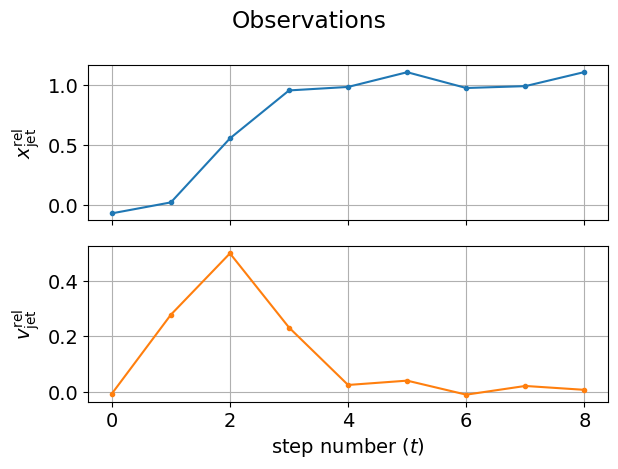

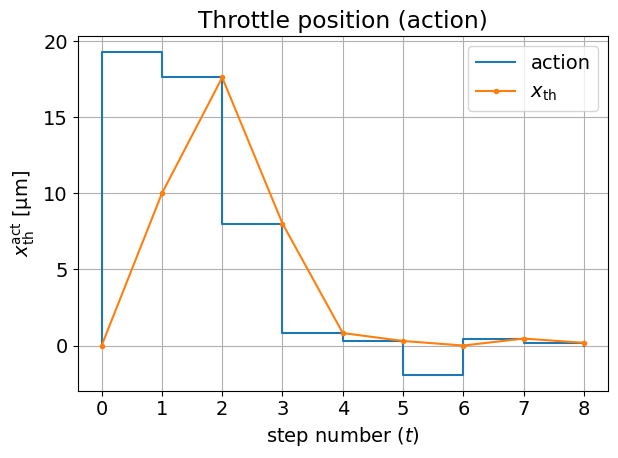

In [5]:
system = HydraulicSystem()
simulator = Simulator(system, N_steps=8, state_init=np.array([1e3, 0])) # N_steps=60
controller = PDController(
    P_coef=18,
    D_coef=0,
)

scenario = SimulationScenario(
    simulator=simulator,
    controller=controller,
    data_path=data_path,
)

scenario.run()
scenario.plot_data(log_data=False)

Total objective: 1.94848


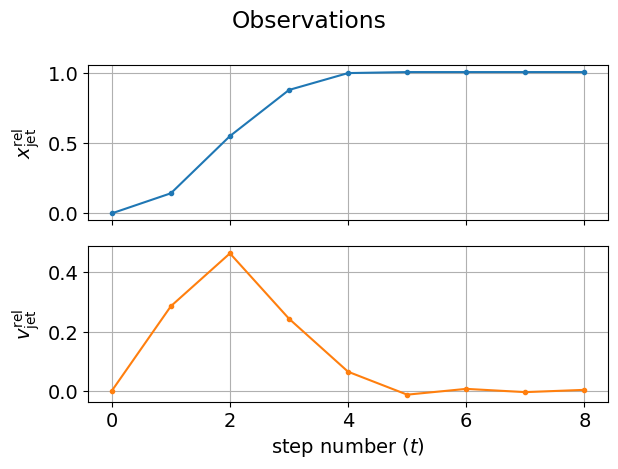

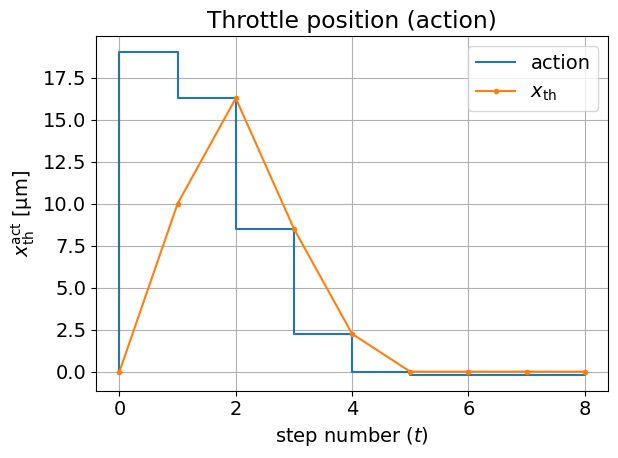

In [9]:
system = HydraulicSystem()
simulator = Simulator(system, N_steps=8, state_init=np.array([1e3, 0])) # N_steps=60
controller = PDController(
    P_coef=19,
    D_coef=0,
)

scenario = SimulationScenario(
    simulator=simulator,
    controller=controller,
)

scenario.run()
scenario.plot_data(log_data=False)

Total objective: 1.94149


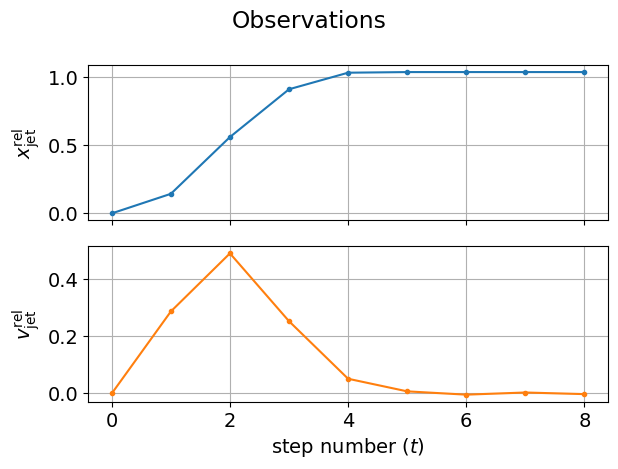

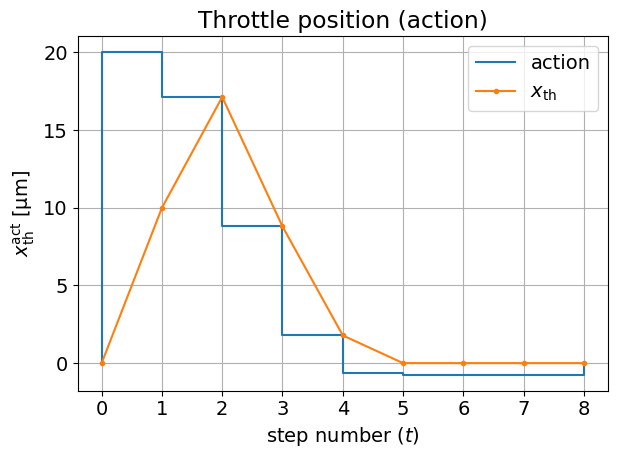

In [10]:
system = HydraulicSystem()
simulator = Simulator(system, N_steps=8, state_init=np.array([1e3, 0])) # N_steps=60
controller = PDController(
    P_coef=20,
    D_coef=0,
)

scenario = SimulationScenario(
    simulator=simulator,
    controller=controller,
)

scenario.run()
scenario.plot_data(log_data=False)

Check ODE solution:

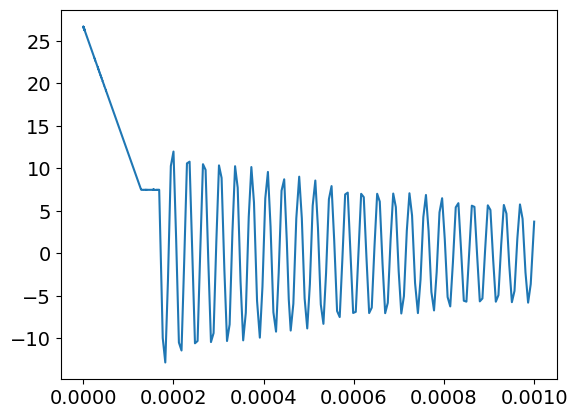

In [14]:
control_step = 5
plt.plot(simulator.ode_results[control_step].t, simulator.ode_results[control_step].y[1,:])

Continue:

Total objective: 1.94696


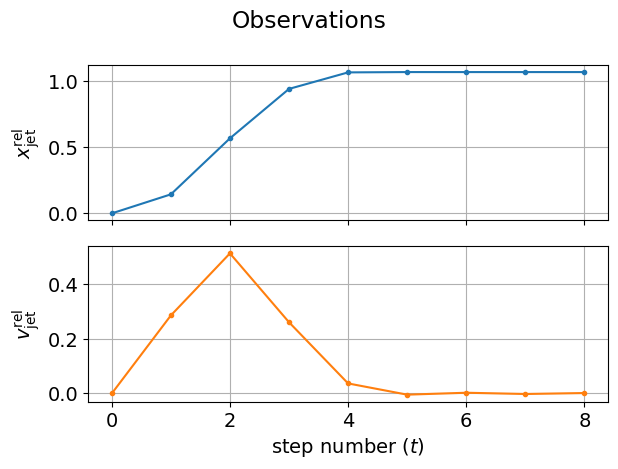

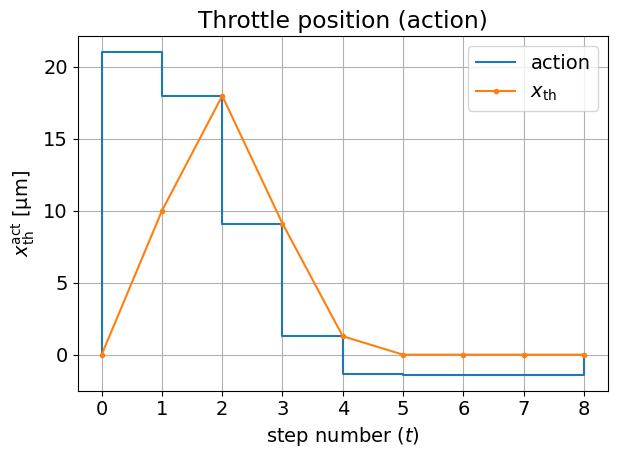

In [12]:
system = HydraulicSystem()
simulator = Simulator(system, N_steps=8, state_init=np.array([1e3, 0])) # N_steps=60
controller = PDController(
    P_coef=21,
    D_coef=0,
)

scenario = SimulationScenario(
    simulator=simulator,
    controller=controller,
)

scenario.run()
scenario.plot_data(log_data=False)

Total objective: 1.93860


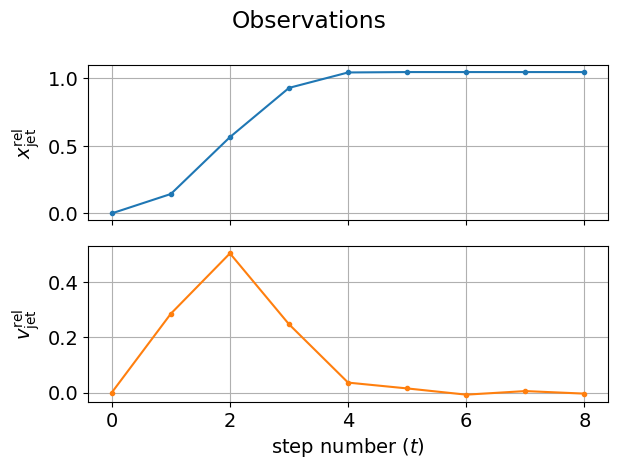

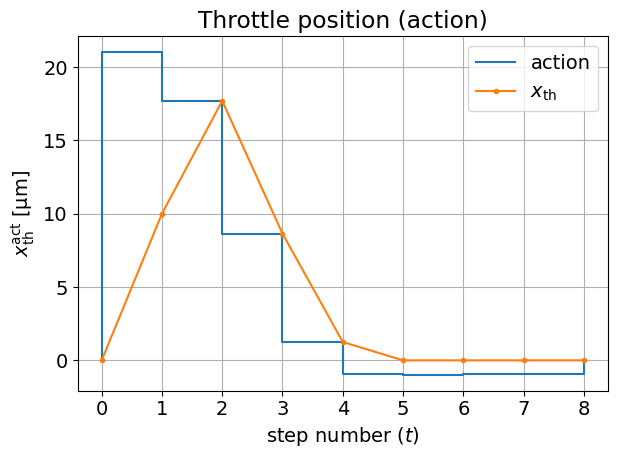

In [13]:
system = HydraulicSystem()
simulator = Simulator(system, N_steps=8, state_init=np.array([1e3, 0])) # N_steps=60
controller = PDController(
    P_coef=21,
    D_coef=1,
)

scenario = SimulationScenario(
    simulator=simulator,
    controller=controller,
)

scenario.run()
scenario.plot_data(log_data=False)

Total objective: 1.94026


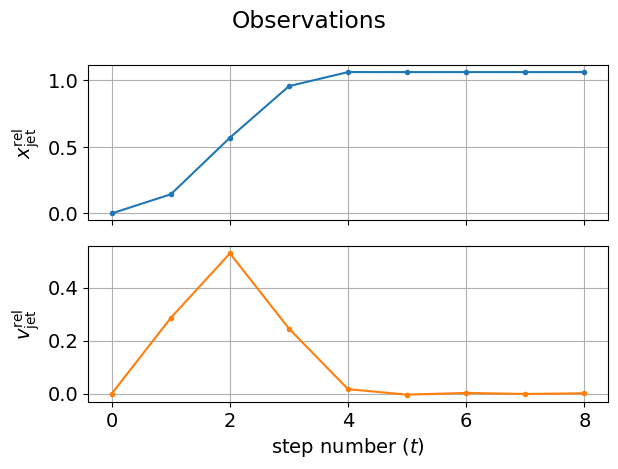

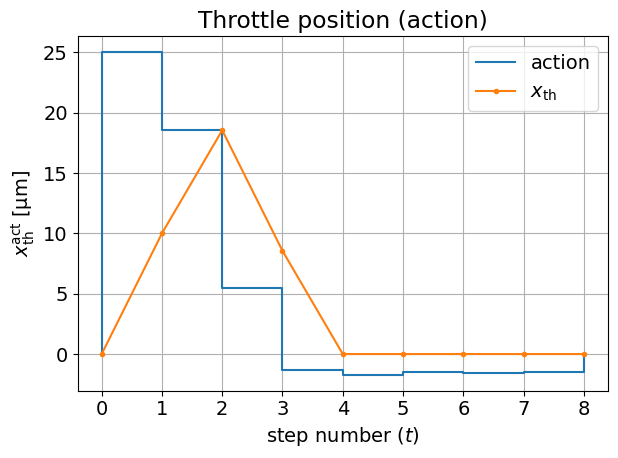

In [14]:
system = HydraulicSystem()
simulator = Simulator(system, N_steps=8, state_init=np.array([1e3, 0])) # N_steps=60
controller = PDController(
    P_coef=25,
    D_coef=10,
)

scenario = SimulationScenario(
    simulator=simulator,
    controller=controller,
)

scenario.run()
scenario.plot_data(log_data=False)

Total objective: 1.92986
log date and time = 2024-03-20_163701


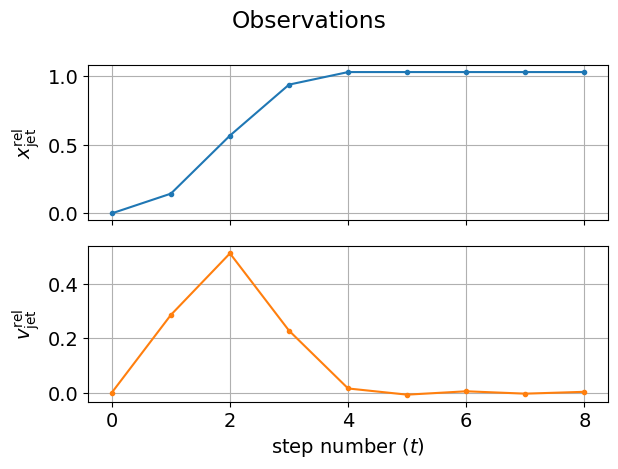

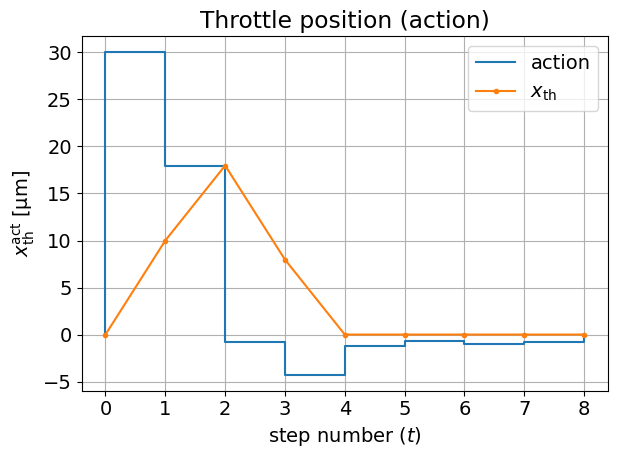

In [15]:
system = HydraulicSystem()
simulator = Simulator(system, N_steps=8, state_init=np.array([1e3, 0])) # N_steps=60
controller = PDController(
    P_coef=30,
    D_coef=27,
)

scenario = SimulationScenario(
    simulator=simulator,
    controller=controller,
)

scenario.run()
scenario.plot_data(log_data=True)

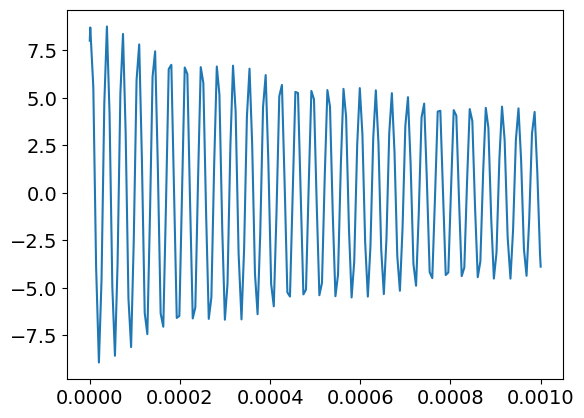

In [27]:
control_step = 5
plt.plot(simulator.ode_results[control_step].t[:], simulator.ode_results[control_step].y[1,:])

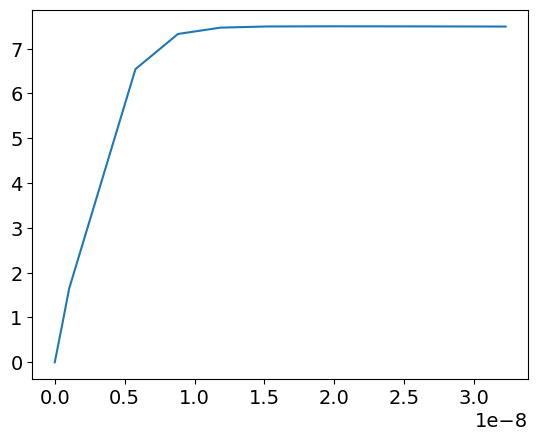

In [17]:
control_step = 1
time_limit = 10
plt.plot(simulator.ode_results[control_step].t[:time_limit], simulator.ode_results[control_step].y[1,:time_limit])

We get this non-linearity dependency because of Friction!

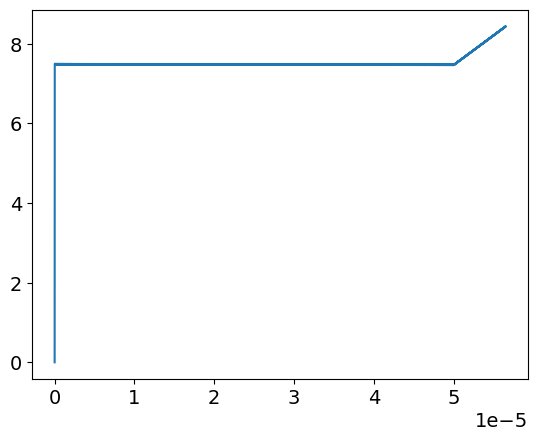

In [18]:
control_step = 1
time_limit = 10000
plt.plot(simulator.ode_results[control_step].t[:time_limit], simulator.ode_results[control_step].y[1,:time_limit])

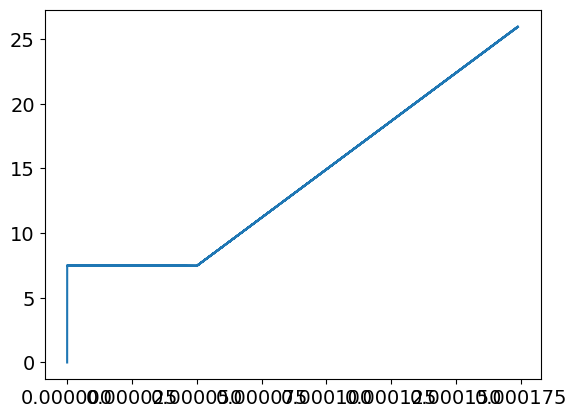

In [19]:
control_step = 1
time_limit = 20000
plt.plot(simulator.ode_results[control_step].t[:time_limit], simulator.ode_results[control_step].y[1,:time_limit])

Total objective: 2.21975


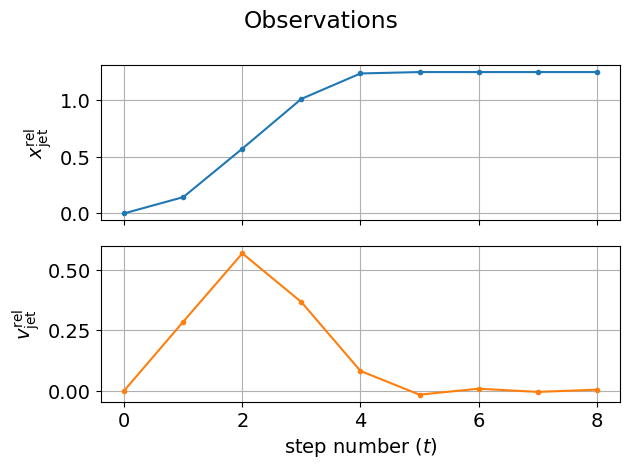

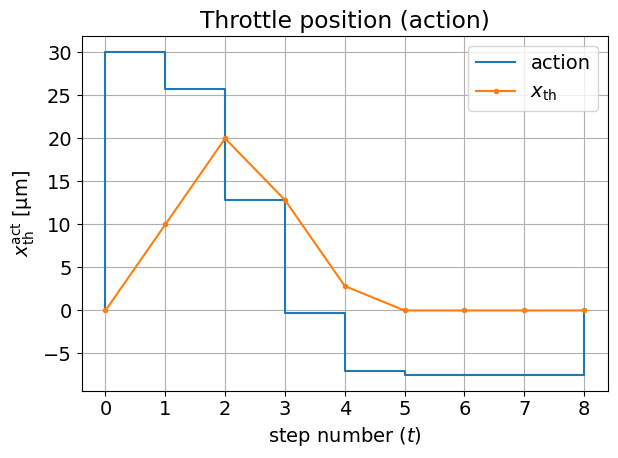

In [26]:
system = HydraulicSystem()
simulator = Simulator(system, N_steps=8, state_init=np.array([1e3, 0])) # N_steps=60
controller = PDController(
    P_coef=30,
    D_coef=0,
)

scenario = SimulationScenario(
    simulator=simulator,
    controller=controller,
)

scenario.run()
scenario.plot_data(log_data=False)